## Final Project Submission

Please fill out:
* Student name: Kaliku Sharon Fatuma
* Student pace:  full time
* Scheduled project review date/time: 15/09/2023
* Instructor name: Nikita Njoroge
* Blog post URL: 


Microsoft  wants to establish their own movie studio just like many big companies and compete within the digital content market.

To assist Microsoft in solving this problem, I will consider:

How many movies are being made of each genre?
What genres are the most successful, both in terms of audience rating and gross earnings?
Of the top grossing films, which genres were most successful (had the highest gross earnings)?
Answering these questions will allow Microsoft to better decide what kind of movies to create in order to match its competitors.

Data Understanding
The data for this analysis is from:

1. Box Office Mojo (movie title, gross earnings)
2. The Movie Database (movie title, audience rating)
3. IMDb (movie title, release year, genres, and audience rating)

The target variables for this analysis are:
1. Release year
2. Gross earnings
3. Genres 
4. Audience ratings

These variables are all important and necessary to address Microsoft's business problem. Audience ratings, gross earnings, and release year are numeric variables and genres are categorical.

The data used in this analysis has been compiled from three different platforms and includes all movies these platforms monitor. Since we are providing Microsoft with recommendations for success, we can safely assume these platforms accurately account for the movies of interest.

As we consider this data however, we should note that the data includes movies from 2010 to 2018. This is noteworthy because the data does not include the most recent three years of movie-making; since movie-watching trends can shift dramatically year to year, the conclusions and recommendations presented here may change based on more recent movies.

Importing Libraries

In [130]:
import sqlite3 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline 

Loading the dataset

In [131]:
BOM_movies = pd.read_csv("./zippedData/bom.movie_gross.csv")
BOM_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Previewing the dataset

In [132]:
#checking top of the dataset
BOM_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [133]:
#checking the bottom of the dataset
BOM_movies.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [134]:
BOM_movies.shape

(3387, 5)

In [135]:
BOM_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [136]:
#checking number of entries in each column
BOM_movies.count()

title             3387
studio            3382
domestic_gross    3359
foreign_gross     2037
year              3387
dtype: int64

In [137]:
#summary of descriptive statistics 
BOM_movies.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [138]:
BOM_movies.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [139]:
BOM_movies.title.unique()

array(['Toy Story 3', 'Alice in Wonderland (2010)',
       'Harry Potter and the Deathly Hallows Part 1', ..., 'El Pacto',
       'The Swan', 'An Actor Prepares'], dtype=object)

In [140]:
BOM_movies.studio.unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', nan, 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE',
       'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.',
       'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.',
       'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.',
       'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM',
       'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket',
       'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4',
       'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer',
       'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP

In [141]:
BOM_movies.title.value_counts()

Bluebeard                           2
The Angry Birds Movie               1
Iron Man 2                          1
No Manches Frida                    1
Next Time I'll Aim for the Heart    1
                                   ..
Love Crime                          1
Zindagi Na Milegi Dobara            1
Genius                              1
Namaste England                     1
The Time That Remains               1
Name: title, Length: 3386, dtype: int64

In [142]:
BOM_movies.title.describe()

count          3387
unique         3386
top       Bluebeard
freq              2
Name: title, dtype: object

2. TheMovie dataset


In [143]:
# Loading and reading the movie db
TheMovie = pd.read_csv('./zippedData/tmdb.movies.csv', index_col=0)


Previewing the dataset

In [144]:
# Checking top of the dataset
TheMovie.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [145]:
# Checking the bottom of the dataset
TheMovie.tail()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [146]:
# checking the dimensions of the data
TheMovie.shape

(26517, 9)

In [147]:
TheMovie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [148]:
#checking number of entries in each column
TheMovie.count()

genre_ids            26517
id                   26517
original_language    26517
original_title       26517
popularity           26517
release_date         26517
title                26517
vote_average         26517
vote_count           26517
dtype: int64

In [149]:
#summary of descriptive statistics 
TheMovie.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [150]:
TheMovie.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [151]:
TheMovie.title.unique()

array(['Harry Potter and the Deathly Hallows: Part 1',
       'How to Train Your Dragon', 'Iron Man 2', ..., 'The Last One',
       'Trailer Made', 'The Church'], dtype=object)

In [152]:
TheMovie.vote_average.value_counts()

6.0     1940
7.0     1560
5.0     1486
10.0    1252
8.0     1231
        ... 
9.4        6
1.2        3
1.4        3
9.1        2
9.7        2
Name: vote_average, Length: 91, dtype: int64

In [153]:
TheMovie.title.describe()

count     26517
unique    24688
top        Home
freq          7
Name: title, dtype: object

In [154]:
TheMovie.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [155]:
#TheMovie = TheMovie.drop(['original_language', 'original_title', 'vote_count'], axis=1)

In [156]:
TheMovie.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [157]:
TheMovie.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [158]:
TheMovie['release_date'] = pd.to_datetime(TheMovie['release_date'])

In [159]:
TheMovie.dtypes

genre_ids                    object
id                            int64
original_language            object
original_title               object
popularity                  float64
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [160]:
TheMovie['release_date'] = pd.to_datetime(TheMovie['release_date'], format='%y/%m/%d')
TheMovie['Year'] = TheMovie['release_date'].dt.strftime('%Y')

In [161]:
TheMovie

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


In [162]:
TheMovie.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count', 'Year'],
      dtype='object')

3. IMDb Dataset

 
Contains two tables 
1. movie ratings - movie id, avarage ratings and number of votes 
2. movie basics - movie id, primary and original titles, start year, runtime minutes and genres


Loading and previewing the IMDB dataset

In [163]:
# reading data from im.db database
conn = sqlite3.connect('./zippedData/im.db')
conn


In [164]:
IMDB_ratings = pd.read_sql(""" SELECT * FROM movie_ratings;""", conn)


Previewing the dataset

In [165]:
#checking top of the dataset
IMDB_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [166]:
#checking the bottom of the dataset
IMDB_ratings.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [167]:
IMDB_ratings.shape

(73856, 3)

In [168]:
IMDB_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [169]:
#checking number of entries in each column
IMDB_ratings.count()

movie_id         73856
averagerating    73856
numvotes         73856
dtype: int64

In [170]:
#summary of descriptive statistics 
IMDB_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [171]:
IMDB_ratings.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [172]:
IMDB_ratings.shape

(73856, 3)

In [173]:
IMDB_ratings.averagerating.describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

Loading the other dataset from IMDB
Movie_basics 

In [174]:
IMdb_basics = pd.read_sql(""" SELECT * FROM movie_basics;""", conn)


Previewing the dataset

In [175]:
# Viewing the top values
IMdb_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [176]:
# Viewing the tail
IMdb_basics.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [177]:
IMdb_basics.shape

(146144, 6)

In [178]:
IMdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [179]:
#checking number of entries in each column
IMdb_basics.count()

movie_id           146144
primary_title      146144
original_title     146123
start_year         146144
runtime_minutes    114405
genres             140736
dtype: int64

In [180]:
#summary of descriptive statistics 
IMdb_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [181]:
IMdb_basics.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [182]:
IMdb_basics.primary_title.unique()

array(['Sunghursh', 'One Day Before the Rainy Season',
       'The Other Side of the Wind', ..., 'Dankyavar Danka', '6 Gunn',
       'Chico Albuquerque - Revelações'], dtype=object)

In [183]:
IMdb_basics.genres.unique()
genres_count_summary = IMdb_basics['genres'].value_counts()
print(genres_count_summary)

Documentary                  32185
Drama                        21486
Comedy                        9177
Horror                        4372
Comedy,Drama                  3519
                             ...  
Biography,Horror                 1
Action,Crime,Music               1
Action,Adventure,Musical         1
Family,Fantasy,History           1
Biography,Fantasy,History        1
Name: genres, Length: 1085, dtype: int64


In [184]:
IMdb_basics.movie_id.unique()


array(['tt0063540', 'tt0066787', 'tt0069049', ..., 'tt9916706',
       'tt9916730', 'tt9916754'], dtype=object)

Cleaning the datasets

In [185]:
BOM_movies.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [186]:
TheMovie.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010


In [187]:
IMdb_basics.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [188]:
IMDB_ratings.head(2)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


Joining IMDb tables to one 


In [189]:
# Joining tables using title as the key
IMDB = IMdb_basics.join(IMDB_ratings.set_index('movie_id'), on = 'movie_id', how  = 'inner')
IMDB

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [190]:
# Drop columns 'original_title', 'runtime_minutes', and 'numvotes' from the DataFrame

IMDB.drop(['original_title', 'runtime_minutes', 'numvotes'], axis=1, inplace=True)
IMDB

,movie_id,primary_title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...,...
146115,tt9913084,Diabolik sono io,2019,Documentary,6.2
146122,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7
146125,tt9914642,Albatross,2017,Documentary,8.5
146129,tt9914942,La vida sense la Sara Amat,2019,None,6.6


In [191]:
# Rename 'start_year' to year and 'primary_title' to 'title'
IMDB.rename(columns={'start_year': 'year', 'primary_title': 'title'}, inplace=True)

In [192]:
IMDB.columns

Index(['movie_id', 'title', 'year', 'genres', 'averagerating'], dtype='object')

In [193]:
IMDB.head(3)

,movie_id,title,year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9


Checking for nulls 


1.Box Office Mojo dataset

In [194]:
BOM_movies.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [195]:
BOM_movies = BOM_movies.drop(['studio'], axis=1)

In [196]:
BOM_movies.head()

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010


In [197]:
BOM_movies.isnull().values.any()

True

In [198]:
BOM_movies.isnull().sum()

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [199]:
#calculating the percentage of null values

# Step 1: Calculate the total number of null values
null_count = BOM_movies.isnull().sum()
null_count

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [200]:
# Step 2: Calculate the total number of values (non-null)
total_count = BOM_movies.shape[0]
total_count

3387

In [201]:

# Step 3:Calculate the percentage of nulls for each column
null_percentage = (null_count / total_count) * 100

print(null_percentage)

title              0.000000
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


The above shows that there is a small percantage of null values, so we can do away with them.

In [202]:
BOM_movies= BOM_movies.dropna()
BOM_movies.shape

(2009, 4)

In [203]:
BOM_movies.isnull().sum()

title             0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [204]:
BOM_movies.head(3)

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010


Checking for duplicates 

In [205]:
BOM_movies.duplicated().sum()

0

Checking for inconsistencies in the data 

In [206]:
BOM_movies.describe()

,domestic_gross,year
count,2.009000e+03,2009.000000
mean,4.697311e+07,2013.503235
std,8.159966e+07,2.598481
min,4.000000e+02,2010.000000
25%,6.650000e+05,2011.000000
50%,1.650000e+07,2013.000000
75%,5.600000e+07,2016.000000
max,9.367000e+08,2018.000000


Checking for anomalies 

In [207]:
BOM_movies.title.value_counts()

The Runaways                  1
Creation                      1
Love Crime                    1
Kill List                     1
The Beguiled (2017)           1
                             ..
Kisses                        1
Far from the Madding Crowd    1
Roman J. Israel, Esq.         1
Son of God                    1
The Time That Remains         1
Name: title, Length: 2009, dtype: int64

In [208]:
BOM_movies.year.value_counts()

2010    309
2011    291
2012    243
2014    234
2013    200
2016    192
2015    190
2017    177
2018    173
Name: year, dtype: int64

In [209]:
BOM_movies.domestic_gross.value_counts()

1500000.0     14
1000000.0     13
1300000.0     12
1100000.0     11
1600000.0     10
              ..
64300000.0     1
41100000.0     1
46400000.0     1
677000.0       1
45900000.0     1
Name: domestic_gross, Length: 1297, dtype: int64

In [210]:
BOM_movies.columns

Index(['title', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [211]:
IMDB.columns

Index(['movie_id', 'title', 'year', 'genres', 'averagerating'], dtype='object')

In [212]:
TheMovie.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count', 'Year'],
      dtype='object')

Cleaning the dataset

In [213]:
IMDB.isnull().values.any()

True

In [214]:
IMDB.isnull().sum()

movie_id           0
title              0
year               0
genres           804
averagerating      0
dtype: int64

In [215]:
#calculating the percentage of null values

# Step 1: Calculate the total number of null values
null_count = IMDB.isnull().sum()
null_count

movie_id           0
title              0
year               0
genres           804
averagerating      0
dtype: int64

In [216]:
# Step 2: Calculate the total number of values (non-null)
total_count = IMDB.shape[0]
total_count

73856

In [217]:

# Step 3:Calculate the percentage of nulls for each column
null_percentage = (null_count / total_count) * 100

print(null_percentage)

movie_id         0.000000
title            0.000000
year             0.000000
genres           1.088605
averagerating    0.000000
dtype: float64


The above shows that there is a small percantage of null values, so we can do away with them.

In [218]:
IMDB= IMDB.dropna()
IMDB.shape

(73052, 5)

In [219]:
IMDB.isnull().sum()

movie_id         0
title            0
year             0
genres           0
averagerating    0
dtype: int64

In [220]:
IMDB

,movie_id,title,year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...,...
146114,tt9913056,Swarm Season,2019,Documentary,6.2
146115,tt9913084,Diabolik sono io,2019,Documentary,6.2
146122,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7
146125,tt9914642,Albatross,2017,Documentary,8.5


Checking for duplicates


In [221]:
IMDB.duplicated().sum()

0

Checking for data inconsistency

In [222]:
IMDB.describe()

,year,averagerating
count,73052.000000,73052.000000
mean,2014.281430,6.330930
std,2.615288,1.474699
min,2010.000000,1.000000
25%,2012.000000,5.500000
50%,2014.000000,6.500000
75%,2017.000000,7.400000
max,2019.000000,10.000000


 Checking for Anomalies

In [223]:
IMDB.averagerating.value_counts()

7.0     2229
6.6     2221
7.2     2217
6.8     2216
6.5     2205
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64

In [224]:
IMDB.year.value_counts()

2017    8638
2016    8613
2015    8405
2014    8269
2013    7905
2012    7602
2018    7476
2011    7274
2010    6701
2019    2169
Name: year, dtype: int64

In [225]:
# Checking datatypes
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 146134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73052 non-null  object 
 1   title          73052 non-null  object 
 2   year           73052 non-null  int64  
 3   genres         73052 non-null  object 
 4   averagerating  73052 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [226]:
# Convert 'year' to datetime
IMDB.loc[:, 'start_year'] = pd.to_datetime(IMDB['year'])


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Making the dataframe smaller to have only relevant data

In [227]:
IMDB

,movie_id,title,year,genres,averagerating,start_year
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,1970-01-01 00:00:00.000002013
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,1970-01-01 00:00:00.000002019
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,1970-01-01 00:00:00.000002018
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,1970-01-01 00:00:00.000002018
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,1970-01-01 00:00:00.000002017
...,...,...,...,...,...,...
146114,tt9913056,Swarm Season,2019,Documentary,6.2,1970-01-01 00:00:00.000002019
146115,tt9913084,Diabolik sono io,2019,Documentary,6.2,1970-01-01 00:00:00.000002019
146122,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7,1970-01-01 00:00:00.000002019
146125,tt9914642,Albatross,2017,Documentary,8.5,1970-01-01 00:00:00.000002017


In [228]:
IMDB =IMDB.drop(['start_year'], axis=1)

In [229]:
IMDB

,movie_id,title,year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...,...
146114,tt9913056,Swarm Season,2019,Documentary,6.2
146115,tt9913084,Diabolik sono io,2019,Documentary,6.2
146122,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7
146125,tt9914642,Albatross,2017,Documentary,8.5


In [230]:
BOM_movies

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3275,I Still See You,1400.0,1500000,2018
3286,The Catcher Was a Spy,725000.0,229000,2018
3309,Time Freak,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,93200.0,5200,2018


In [231]:
BOM_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   domestic_gross  2009 non-null   float64
 2   foreign_gross   2009 non-null   object 
 3   year            2009 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 78.5+ KB


In [232]:
# Remove commas and convert the column to numeric
BOM_movies['foreign_gross'] = BOM_movies['foreign_gross'].str.replace(',', '').astype(float)
# Divide the column by 1,000,000
BOM_movies['foreign_gross'] = pd.to_numeric(BOM_movies['foreign_gross']) / 1000000
# Display the DataFrame with the specified column divided by 1,000,000
print(BOM_movies)

                                                  title  domestic_gross  \
0                                           Toy Story 3     415000000.0   
1                            Alice in Wonderland (2010)     334200000.0   
2           Harry Potter and the Deathly Hallows Part 1     296000000.0   
3                                             Inception     292600000.0   
4                                   Shrek Forever After     238700000.0   
...                                                 ...             ...   
3275                                    I Still See You          1400.0   
3286                              The Catcher Was a Spy        725000.0   
3309                                         Time Freak         10000.0   
3342  Reign of Judges: Title of Liberty - Concept Short         93200.0   
3353            Antonio Lopez 1970: Sex Fashion & Disco         43200.0   

      foreign_gross  year  
0          652.0000  2010  
1          691.3000  2010  
2          664.

In [233]:
BOM_movies.columns

Index(['title', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [234]:
TheMovie.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count', 'Year'],
      dtype='object')

In [235]:
IMDB.columns

Index(['movie_id', 'title', 'year', 'genres', 'averagerating'], dtype='object')

Explatory Data Analysis

In [236]:
# Display the start, end, and period of the movies
start_date = BOM_movies.year.min()
end_date = BOM_movies.year.max()
period = end_date - start_date

print("Start:", start_date)
print("End:", end_date)
print("Period:", period)

Start: 2010
End: 2018
Period: 8


In [237]:
# Drop NaN values 
TheMovie.dropna(inplace=True)
TheMovie

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


In [238]:
# Drop Nan values 
IMDB.dropna(inplace=True)
IMDB

,movie_id,title,year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...,...
146114,tt9913056,Swarm Season,2019,Documentary,6.2
146115,tt9913084,Diabolik sono io,2019,Documentary,6.2
146122,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7
146125,tt9914642,Albatross,2017,Documentary,8.5


In [239]:
# To check if the NaN values were dropped 
IMDB.shape

(73052, 5)

In [240]:
# Average rating 
ratings_average = IMDB['averagerating'].mean()
ratings_average

6.330930022449761

In [241]:
IMDB.columns

Index(['movie_id', 'title', 'year', 'genres', 'averagerating'], dtype='object')

In [242]:
IMDB.describe()

,year,averagerating
count,73052.000000,73052.000000
mean,2014.281430,6.330930
std,2.615288,1.474699
min,2010.000000,1.000000
25%,2012.000000,5.500000
50%,2014.000000,6.500000
75%,2017.000000,7.400000
max,2019.000000,10.000000


In [243]:
BOM_movies.head()

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652.0,2010
1,Alice in Wonderland (2010),334200000.0,691.3,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664.3,2010
3,Inception,292600000.0,535.7,2010
4,Shrek Forever After,238700000.0,513.9,2010


In [244]:
# Domestic avarage gross
domestic_gross_average = BOM_movies['domestic_gross'].mean()
domestic_gross_average

46973114.3777999

In [245]:
IMDB.head(2)

,movie_id,title,year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2


In [246]:
TheMovie.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count', 'Year'],
      dtype='object')

In [247]:
TheMovie.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010


In [248]:
BOM_movies.head(2)

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652.0,2010
1,Alice in Wonderland (2010),334200000.0,691.3,2010


Merging all the tables to one 
Box Office mojo
The Movie
IMDb 

In [249]:
merged_df = BOM_movies.merge(TheMovie, on='title', how='inner').merge(IMDB, on='title', how='inner')

In [250]:
merged_df.head(5)

,title,domestic_gross,foreign_gross,year_x,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,Year,movie_id,year_y,genres,averagerating
0,Toy Story 3,415000000.0,652.0,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,2010,tt0435761,2010,"Adventure,Animation,Comedy",8.3
1,Inception,292600000.0,535.7,2010,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,2010,tt1375666,2010,"Action,Adventure,Sci-Fi",8.8
2,Shrek Forever After,238700000.0,513.9,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,2010,tt0892791,2010,"Adventure,Animation,Comedy",6.3
3,The Twilight Saga: Eclipse,300500000.0,398.0,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,2010,tt1325004,2010,"Adventure,Drama,Fantasy",5.0
4,Iron Man 2,312400000.0,311.5,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368,2010,tt1228705,2010,"Action,Adventure,Sci-Fi",7.0


In [251]:
merged_df.columns

Index(['title', 'domestic_gross', 'foreign_gross', 'year_x', 'genre_ids', 'id',
       'original_language', 'original_title', 'popularity', 'release_date',
       'vote_average', 'vote_count', 'Year', 'movie_id', 'year_y', 'genres',
       'averagerating'],
      dtype='object')

In [252]:
# Drop multiple columns
merged_df = merged_df.drop(columns=['domestic_gross', 'year_x', 'genre_ids', 'original_language', 'original_title','release_date', 'year_y', 'vote_count'])
merged_df

,title,foreign_gross,id,popularity,vote_average,Year,movie_id,genres,averagerating
0,Toy Story 3,652.000,10193,24.445,7.7,2010,tt0435761,"Adventure,Animation,Comedy",8.3
1,Inception,535.700,27205,27.920,8.3,2010,tt1375666,"Action,Adventure,Sci-Fi",8.8
2,Shrek Forever After,513.900,10192,15.041,6.1,2010,tt0892791,"Adventure,Animation,Comedy",6.3
3,The Twilight Saga: Eclipse,398.000,24021,20.340,6.0,2010,tt1325004,"Adventure,Drama,Fantasy",5.0
4,Iron Man 2,311.500,10138,28.515,6.8,2010,tt1228705,"Action,Adventure,Sci-Fi",7.0
...,...,...,...,...,...,...,...,...,...
2040,Bilal: A New Breed of Hero,1.700,332718,2.707,6.8,2018,tt3576728,"Action,Adventure,Animation",8.0
2041,I Still See You,1.500,448095,12.867,6.8,2018,tt2160105,"Fantasy,Thriller",5.7
2042,The Catcher Was a Spy,0.229,467952,9.727,6.2,2018,tt4602066,"Biography,Drama,War",6.2
2043,Time Freak,0.256,92968,1.604,6.9,2011,tt6769280,"Comedy,Drama,Romance",5.7


In [253]:
merged_df.describe()

,foreign_gross,id,popularity,vote_average,averagerating
count,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000
mean,83.614927,201494.369682,11.712381,6.390856,6.439413
std,142.689276,141355.561866,7.954126,0.938677,1.031724
min,0.000600,1771.000000,0.600000,1.000000,1.600000
25%,5.600000,68722.000000,7.272000,5.900000,5.900000
50%,24.300000,181283.000000,10.305000,6.400000,6.500000
75%,88.000000,328387.000000,14.797000,7.000000,7.200000
max,946.400000,522921.000000,80.773000,10.000000,9.200000


In [254]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2044
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2045 non-null   object 
 1   foreign_gross  2045 non-null   float64
 2   id             2045 non-null   int64  
 3   popularity     2045 non-null   float64
 4   vote_average   2045 non-null   float64
 5   Year           2045 non-null   object 
 6   movie_id       2045 non-null   object 
 7   genres         2045 non-null   object 
 8   averagerating  2045 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 159.8+ KB


In [255]:
# Convert the gross columns and rating column into integer
merged_df['foreign_gross'] = merged_df['foreign_gross'].astype(int)
merged_df['averagerating'] = merged_df['averagerating'].astype(int)
merged_df['Year'] = merged_df['Year'].astype(int)


In [256]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2044
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2045 non-null   object 
 1   foreign_gross  2045 non-null   int32  
 2   id             2045 non-null   int64  
 3   popularity     2045 non-null   float64
 4   vote_average   2045 non-null   float64
 5   Year           2045 non-null   int32  
 6   movie_id       2045 non-null   object 
 7   genres         2045 non-null   object 
 8   averagerating  2045 non-null   int32  
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 135.8+ KB


In [257]:
# Filter out rows with non-numeric 'foreign_gross' values
merged_df = merged_df[pd.to_numeric(merged_df['foreign_gross'], errors='coerce').notna()]

In [258]:
# Splitting the genre column to have a genre for each movie in the table 
filtered_df = filtered_df.assign(genres = filtered_df['genres'].str.split(',')).explode('genres')
filtered_df.head(4)

NameError: name 'filtered_df' is not defined

In [ ]:
filtered_df = pd.DataFrame(filtered_df)
filtered_df =filtered_df[(filtered_df['averagerating'] >= 5) &
                        (filtered_df['foreign_gross'] >= 248) &
                        (filtered_df['Year'] > 2017)]

In [ ]:
filtered_df.head()

,title,foreign_gross,id,popularity,vote_average,Year,movie_id,genres,averagerating
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Action,7
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Adventure,7
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Sci-Fi,7
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Action,6
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Adventure,6


Univariate Analysis

Description table

In [ ]:
#checking the categorical data
filtered_df.title.describe()

count          55
unique         18
top       The Nun
freq            4
Name: title, dtype: object

In [ ]:
filtered_df.genres.describe()

count            55
unique           15
top       Adventure
freq             13
Name: genres, dtype: object

Measure of central tendency


In [ ]:
# Finding mean
print("The average of ratings is:",filtered_df.averagerating.mean())


The average of ratings is: 6.381818181818182


In [ ]:
# Finding mean
print("The average of Gross is:",filtered_df.foreign_gross.mean())


The average of Gross is: 491.0


In [ ]:
#Finding median
print("The median of gross is:",filtered_df.foreign_gross.median())

The median of gross is: 445.0


In [ ]:
#Finding median
print("The median of ratings is:",filtered_df.averagerating.median())


The median of ratings is: 6.0


In [ ]:
#Finding mode
print("The mode of average rating is:",filtered_df.averagerating.mode())
print("The mode of gross income is:",filtered_df.foreign_gross.mode())

The mode of average rating is: 0    7
dtype: int32
The mode of gross income is: 0    361
dtype: int32


Measures of dispersion

In [ ]:
# Range for the foreign gross
Gross_max  = filtered_df['foreign_gross'].max()
Gross_min = filtered_df['foreign_gross'].min()

Gross_range = Gross_max-Gross_min

print(Gross_max,Gross_min)
print(Gross_range)

891 248
643


In [ ]:
# Range for the average rating
rating_max  = filtered_df['averagerating'].max()
rating_min = filtered_df['averagerating'].min()

rating_range = rating_max-rating_min

print(rating_max,rating_min)
print(rating_range)

8 5
3


In [ ]:
filtered_df.describe()

,foreign_gross,id,popularity,vote_average,Year,averagerating
count,55.000000,55.000000,55.000000,55.000000,55.0,55.000000
mean,491.000000,380070.200000,33.494436,6.903636,2018.0,6.381818
std,181.119666,63824.939502,11.049064,0.645200,0.0,0.827556
min,248.000000,260513.000000,6.637000,5.600000,2018.0,5.000000
25%,361.000000,338952.000000,29.690000,6.500000,2018.0,6.000000
50%,445.000000,383498.000000,34.958000,6.900000,2018.0,6.000000
75%,634.000000,424783.000000,43.078000,7.400000,2018.0,7.000000
max,891.000000,497984.000000,48.508000,8.100000,2018.0,8.000000


In [ ]:
# Create a new table with only top  titles and genres 
# Select specific columns to create a new DataFrame
genres_df = filtered_df[['title', 'genres']]
genres_df

,title,genres
1862,Black Panther,Action
1862,Black Panther,Adventure
1862,Black Panther,Sci-Fi
1863,Jurassic World: Fallen Kingdom,Action
1863,Jurassic World: Fallen Kingdom,Adventure
1863,Jurassic World: Fallen Kingdom,Sci-Fi
1864,Incredibles 2,Action
1864,Incredibles 2,Adventure
1864,Incredibles 2,Animation
1865,Aquaman,Action


In [ ]:
# Group the data by 'genres' and count the number of movies per genre
genre_counts = filtered_df['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Number of Movies']

# Sort the table by the number of movies in descending order
sorted_genre_table = genre_counts.sort_values(by='Number of Movies', ascending=False)
genre_counts

,Genre,Number of Movies
0,Adventure,13
1,Action,11
2,Sci-Fi,6
3,Comedy,6
4,Thriller,3
5,Animation,3
6,Drama,3
7,Fantasy,2
8,Horror,2
9,Biography,1


Plotting histograms to visualize patterns in the data

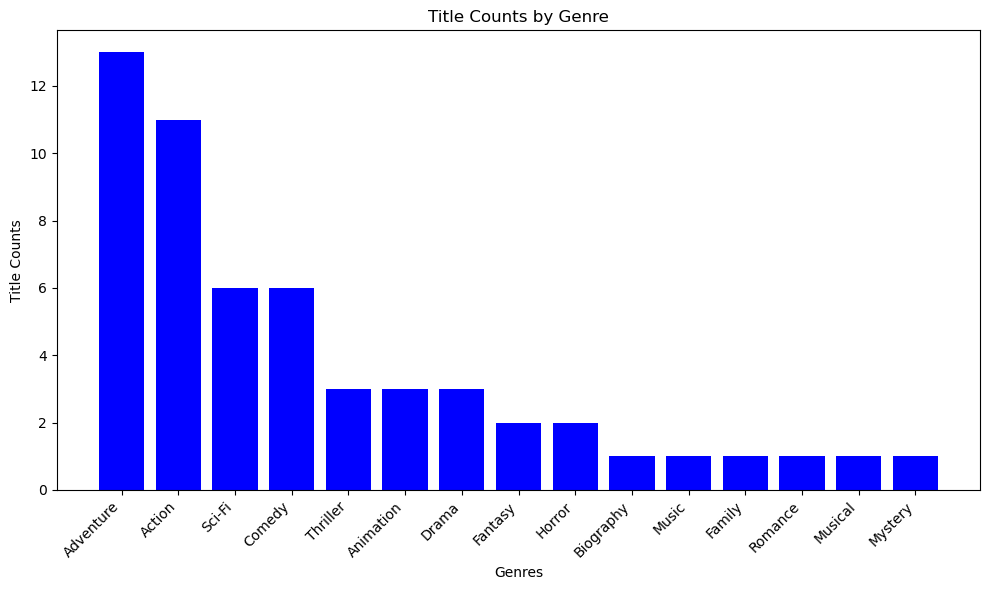

In [ ]:
df = pd.DataFrame(genre_counts)
plt.figure(figsize=(10, 6))
plt.bar(df['Genre'], df['Number of Movies'], color='blue')
plt.xlabel('Genres')
plt.ylabel('Title Counts')
plt.title('Title Counts by Genre')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Adventure movies have the most number of titles in the market

In [ ]:
filtered_df.head()

,title,foreign_gross,id,popularity,vote_average,Year,movie_id,genres,averagerating
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Action,7
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Adventure,7
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Sci-Fi,7
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Action,6
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Adventure,6


In [ ]:
# Group the data by 'genres' and count averagerating  per genre
rating_counts = filtered_df['genres'].value_counts().reset_index()
rating_counts.columns = ['Genre', 'averagerating']

rating_counts

,Genre,averagerating
0,Adventure,13
1,Action,11
2,Sci-Fi,6
3,Comedy,6
4,Thriller,3
5,Animation,3
6,Drama,3
7,Fantasy,2
8,Horror,2
9,Biography,1


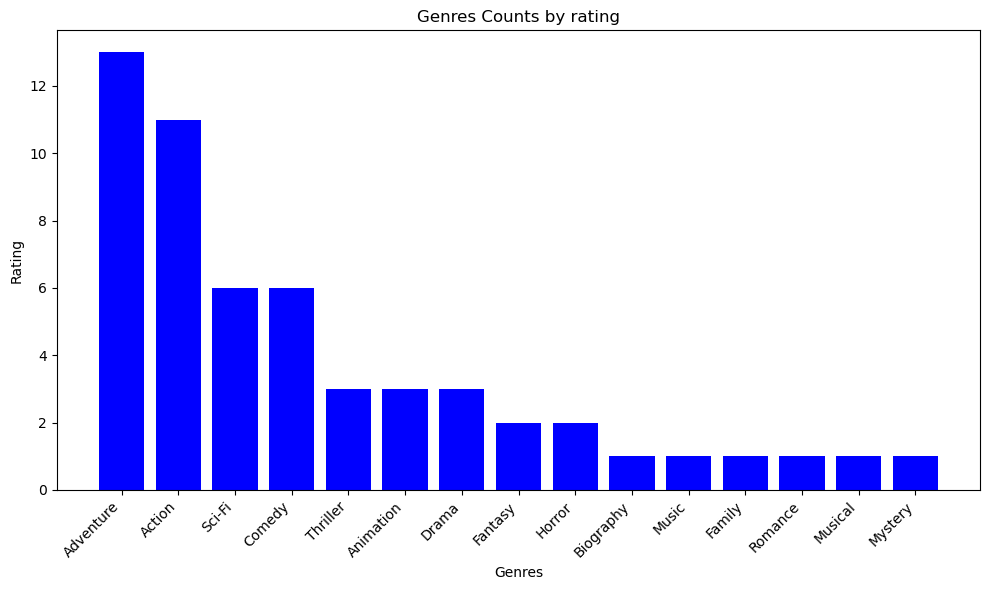

In [ ]:
df = pd.DataFrame(rating_counts)
plt.figure(figsize=(10, 6))
plt.bar(df['Genre'], df['averagerating'], color='blue')
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.title('Genres Counts by rating')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Adventure movies have the highest ratings in the movie industry

In [ ]:
filtered_df.head()

,title,foreign_gross,id,popularity,vote_average,Year,movie_id,genres,averagerating
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Action,7
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Adventure,7
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Sci-Fi,7
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Action,6
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Adventure,6


In [ ]:
# Sort the DataFrame by 'foreign_gross' in descending order
sorted_df = filtered_df.sort_values(by='foreign_gross', ascending=False)
sorted_df.head(4)

,title,foreign_gross,id,popularity,vote_average,Year,movie_id,genres,averagerating
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Action,6
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Adventure,6
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Sci-Fi,6
1865,Aquaman,812,297802,38.102,6.8,2018,tt1477834,Action,7


In [ ]:
# Sort the DataFrame by 'gross' in descending order
sorted_df = sorted_df.sort_values(by='foreign_gross', ascending=False)
sorted_df.head()

,title,foreign_gross,id,popularity,vote_average,Year,movie_id,genres,averagerating
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Action,6
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Sci-Fi,6
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Adventure,6
1865,Aquaman,812,297802,38.102,6.8,2018,tt1477834,Action,7
1865,Aquaman,812,297802,38.102,6.8,2018,tt1477834,Adventure,7


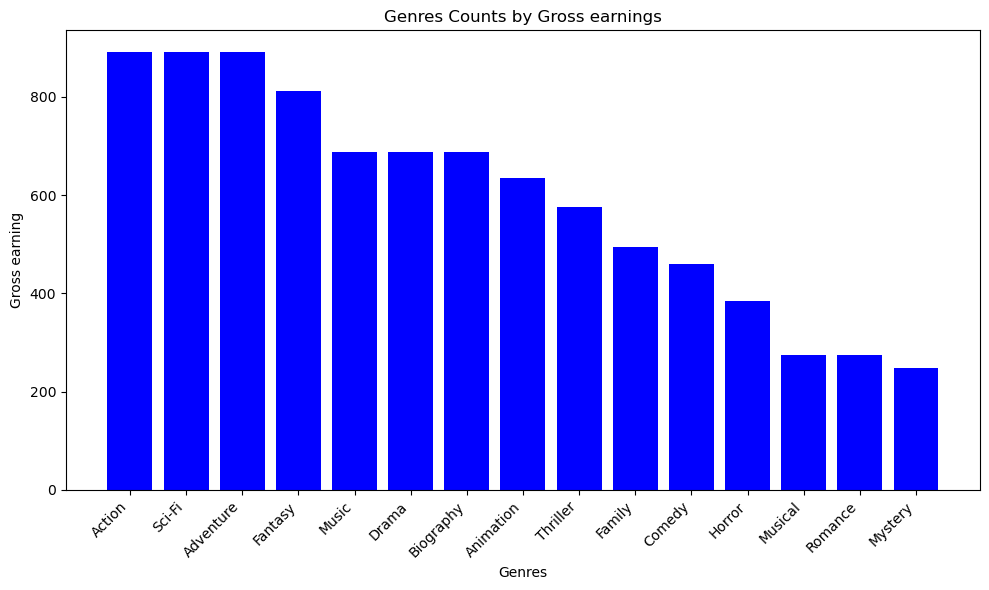

In [ ]:
df = pd.DataFrame(sorted_df)
plt.figure(figsize=(10, 6))
plt.bar(df['genres'], df['foreign_gross'], color='blue')
plt.xlabel('Genres')
plt.ylabel('Gross earning')
plt.title('Genres Counts by Gross earnings')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Action movies, adventure movies and sci-fi have the highest gross earnings in the movie market

Bivariate Analysis

Shows relationship between 2 variables genres vs average ratings


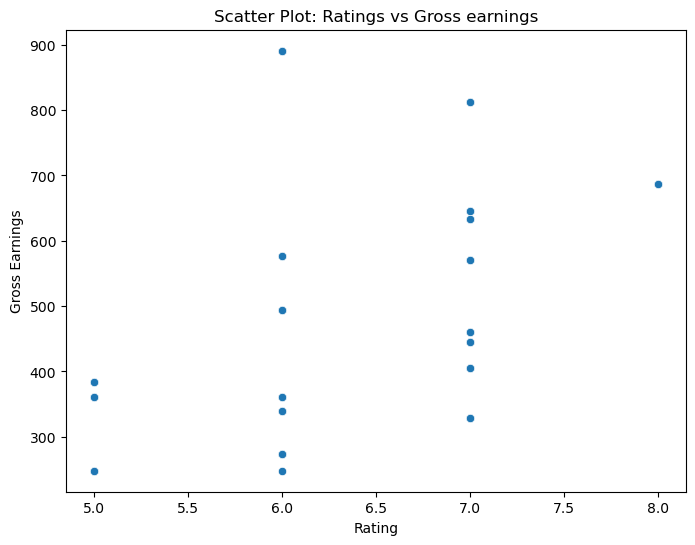

In [ ]:
# Scatter plot for Gross earnings vs. Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='averagerating', y='foreign_gross')
plt.xlabel('Rating')
plt.ylabel('Gross Earnings')
plt.title('Scatter Plot: Ratings vs Gross earnings')
plt.show()

There is no linear relation between Quantity and price

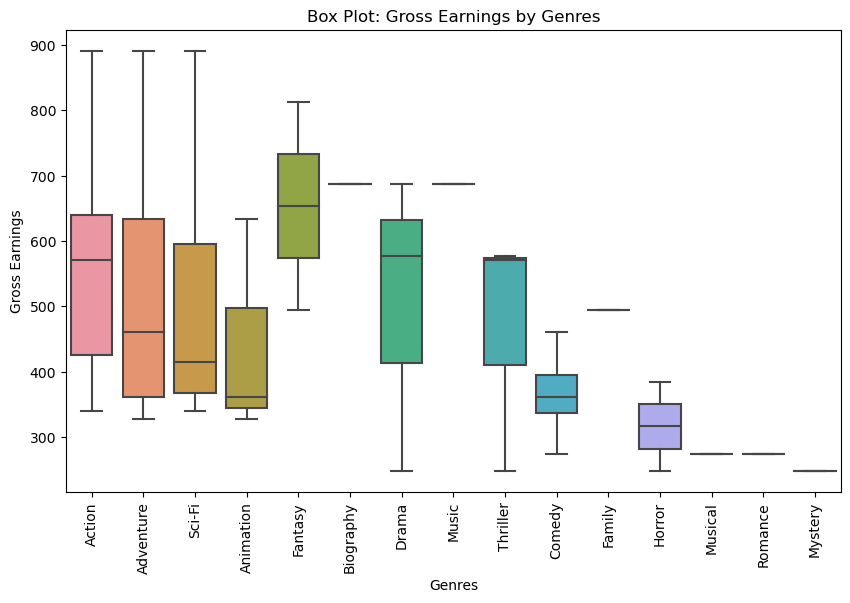

In [ ]:
# Box plot for Gross by Genres
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='genres', y='foreign_gross')
plt.xlabel('Genres')
plt.ylabel('Gross Earnings')
plt.title('Box Plot: Gross Earnings by Genres')
plt.xticks(rotation=90)
plt.show()

There is high distribution of genres with an earning of 300million dollars to 650 million dollarsas compared to the rest of the genres. Also noted there were no outliers in the genres.

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1862 to 1884
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          55 non-null     object 
 1   foreign_gross  55 non-null     int32  
 2   id             55 non-null     int64  
 3   popularity     55 non-null     float64
 4   vote_average   55 non-null     float64
 5   Year           55 non-null     int32  
 6   movie_id       55 non-null     object 
 7   genres         55 non-null     object 
 8   averagerating  55 non-null     int32  
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 4.9+ KB


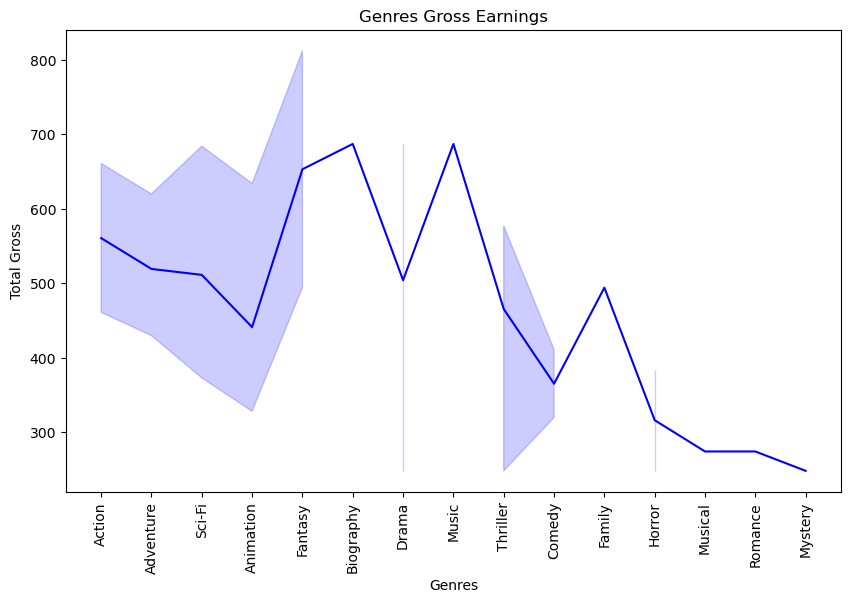

In [ ]:
# Genres gross earnings line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='genres', y='foreign_gross', color='blue')
plt.xlabel('Genres')
plt.ylabel('Total Gross')
plt.title('Genres Gross Earnings')
plt.xticks(rotation=90)
plt.show()

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1862 to 1884
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          55 non-null     object 
 1   foreign_gross  55 non-null     int32  
 2   id             55 non-null     int64  
 3   popularity     55 non-null     float64
 4   vote_average   55 non-null     float64
 5   Year           55 non-null     int32  
 6   movie_id       55 non-null     object 
 7   genres         55 non-null     object 
 8   averagerating  55 non-null     int32  
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 4.9+ KB


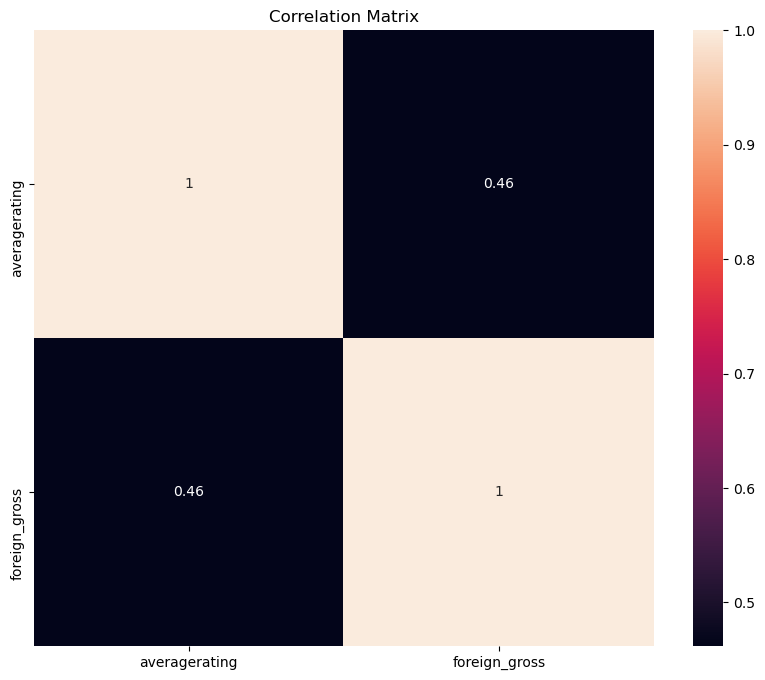

In [ ]:

# 2. Correlation matrix
# Select the numerical variables for which you want to calculate the correlation matrix
numerical_values =filtered_df[['averagerating', 'foreign_gross']]

#Calculate the correlation matrix using the corr() method
correlation_matrix = numerical_values.corr()

#Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()



There is positive correlation between the avarage rating and foreign gross, meaning as the rating increases the foreign gross also increases.

  Multivariate Analysis


In [ ]:
filtered_df.head(4)

,title,foreign_gross,id,popularity,vote_average,Year,movie_id,genres,averagerating
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Action,7
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Adventure,7
1862,Black Panther,646,284054,44.140,7.4,2018,tt1825683,Sci-Fi,7
1863,Jurassic World: Fallen Kingdom,891,351286,34.958,6.5,2018,tt4881806,Action,6


In [ ]:
# Descriptive Statistics
# Compute basic statistics for numerical variables
numerical_stats = filtered_df[['foreign_gross', 'averagerating', 'vote_average', 'Year','popularity']].describe()
print(numerical_stats)

       foreign_gross  averagerating  vote_average    Year  popularity
count      55.000000      55.000000     55.000000    55.0   55.000000
mean      491.000000       6.381818      6.903636  2018.0   33.494436
std       181.119666       0.827556      0.645200     0.0   11.049064
min       248.000000       5.000000      5.600000  2018.0    6.637000
25%       361.000000       6.000000      6.500000  2018.0   29.690000
50%       445.000000       6.000000      6.900000  2018.0   34.958000
75%       634.000000       7.000000      7.400000  2018.0   43.078000
max       891.000000       8.000000      8.100000  2018.0   48.508000


Conclusion 

The stated business problem presented by Microsoft is getting in the movie production market by having their own movie stuido to be bale to copete effectively in the movie market and their need to know what kind of movies will be the most succeful in the market.
This analysis tried to solve the problem stated by Microsoft Cooporation by seeking to know what movies have been the  most succeful in the movie market based on the audience ratins, the total gross earnings for the last 1 year i.e. between 2017 and 2018. usimg three datasets from the movie industry giants of IMDb, The Movie Database and the Box Office Mojo, the data is trustworthy.

This analysis of movies from 2017-2018 shows the following:

1. There was a total of 13 adventure movies made.
2. Adventure, Action, Sci-Fi and comedy  had the highest average rating.
3. Sci-Fi, Adventure, Fantasy, and Action all averaged more than 812 million dollars per movie.
4. Action and Adventure had the highest total gross earnings, 891 million and 812 million, respectively.

RECOMENDATIONS 

Based on the analysis and conclusions drawn from the data used in my analysis, here are some recommendations for Microsoft Corporation as they enter the movie production market:

Microsoft should Consider Investing in Adventure Movies as the data suggests that adventure movies, on average, received high ratings and generated substantial earnings. Microsoft may want to consider producing adventure films as part of their movie lineup.

They should Focus on High-Quality Content, genres like Adventure, Action, Sci-Fi, and Comedy received high average ratings. Microsoft should prioritize creating high-quality content within these genres to attract and retain audiences.

Invest in Sci-Fi and Fantasy Genres as both had  high average ratings and significant earnings per movie. Microsoft may find it lucrative to explore these genres in their film production endeavors.

Action and Adventure genres dominated in terms of total gross earnings. Consider allocating resources to produce movies in these genres, as they have a proven track record of success at the box office.

The analysis is based on data from 2017-2018. Microsoft should continuously monitor market trends and audience preferences to stay up-to-date with changing tastes and adjust their production strategies accordingly.

While the number of adventure movies was relatively low, their quality and earnings were high. Microsoft should prioritize producing fewer high-quality movies rather than flooding the market with a large quantity of films.

Engage with the audience and gather feedback to understand their preferences and expectations. Building a strong relationship with the audience can lead to more successful films.

Consider collaborating with experienced directors, producers, and writers in the industry to leverage their expertise and enhance the quality of movie production.

Develop effective marketing and distribution strategies to ensure that the movies reach their target audience and maximize box office earnings.

While the analysis points to specific genres, it's essential to maintain a diverse portfolio of movie genres to cater to a broad audience. Don't limit to one genre alone.

It's important to note that the movie industry is highly competitive and subject to evolving trends. Microsoft should conduct thorough market research, stay flexible, and adapt to changing market dynamics to increase their chances of success in the movie production business.





